# Evaluation of using OLS vs direct models

*By William Caban*

Evaluation of base models `granite-7b-lab` and `GPT 3.5` compared to OpenShift Lightspeed with the same backend models, in OpenShift expertise.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from E3_evaluator_qna_eval_metrics import checkpoint, score_gleu, score_meteor, score_rouge

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williamcaban/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# read existing model score
EVALS_FNAME="eval_scores_checkpoint.parquet"
df_scores = pd.read_parquet(EVALS_FNAME)
print(f"Num of samples for scores: {df_scores.shape[0]}")

Num of samples for scores: 977


In [10]:
df_scores.columns

Index(['Question', 'Answer', 'doc_title', 'GRANITE7B', 'OLS_GRANITE', 'OPENAI',
       'OLS_OAI', 'Answer@gleu', 'GRANITE7B@gleu', 'OLS_GRANITE@gleu',
       'OPENAI@gleu', 'OLS_OAI@gleu', 'Answer@meteor', 'GRANITE7B@meteor',
       'OLS_GRANITE@meteor', 'OPENAI@meteor', 'OLS_OAI@meteor', 'Answer@rouge',
       'Answer@rougeN:precision', 'Answer@rougeN:recall',
       'Answer@rougeN:fmeasure', 'Answer@rougeL:precision',
       'Answer@rougeL:recall', 'Answer@rougeL:fmeasure', 'GRANITE7B@rouge',
       'GRANITE7B@rougeN:precision', 'GRANITE7B@rougeN:recall',
       'GRANITE7B@rougeN:fmeasure', 'GRANITE7B@rougeL:precision',
       'GRANITE7B@rougeL:recall', 'GRANITE7B@rougeL:fmeasure',
       'OLS_GRANITE@rouge', 'OLS_GRANITE@rougeN:precision',
       'OLS_GRANITE@rougeN:recall', 'OLS_GRANITE@rougeN:fmeasure',
       'OLS_GRANITE@rougeL:precision', 'OLS_GRANITE@rougeL:recall',
       'OLS_GRANITE@rougeL:fmeasure', 'OPENAI@rouge',
       'OPENAI@rougeN:precision', 'OPENAI@rougeN:recall',


## Metrics


| Metric | Description |
|:-----  |:------------ |
| GLEU   | Evaluation metric to estimate fluency. Compares model generated text and human generated text. (higher the better, 0 to 1) |
| METEOR | Precision-based metric to measure quality of generated text. Allows synonyms and stemmed words to be matched with the reference word. |
| ROUGE  | Recall focused metrics. Compares quality of generated to reference text. How many words a model recall? |
|| **ROUGE-N** scores are excellent around 0.5, with scores above 0.5 considered good and 0.4 to 0.5 moderate |
|| **ROUGE-L** scores are good around 0.4 and low at 0.3 to 0.4. |
|||
|||

In [12]:
# Work on a copy 
df=df_scores.copy()

In [16]:
MODELS = [
    'GRANITE7B',   # instructlab/granite-7b-lab
    'OLS_GRANITE', # OLS w/GRANITE7B
    'OPENAI',      # OpenAI GPT 3.5
    'OLS_OAI',     # OLS w/OPENAI
]

In [20]:
_ = score_gleu(df, MODELS)
_ = score_meteor(df, MODELS)
_ = score_rouge(df, MODELS)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.87it/s]



#################### GLEU SCORE

                  Model          P95          P99 
              GRANITE7B        0.235        0.434
            OLS_GRANITE        0.379        0.654
                 OPENAI        0.279        0.389
                OLS_OAI        0.477        0.729


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  4.97it/s]



#################### METEOR SCORE 

                  Model          P95          P99 
              GRANITE7B        0.432        0.684
            OLS_GRANITE        0.594        0.854
                 OPENAI        0.507        0.661
                OLS_OAI        0.669        0.883


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.61s/it]


#################### ROUGE SCORE

              GRANITE7B R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.259        0.281        0.189        0.688        0.618        0.431 
                    p99        0.680        0.500        0.393        0.910        0.849        0.605 

            OLS_GRANITE R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.714        0.381        0.420        0.930        0.656        0.619 
                    p99        1.000        0.802        0.733        1.000        0.921        0.865 

                 OPENAI R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.260        0.314        0.232        0.548        0.650        0.478 
                    p99        0.478        0.593        0.391        0.833        0.855        0.597 

                OLS_OAI R5-precisio

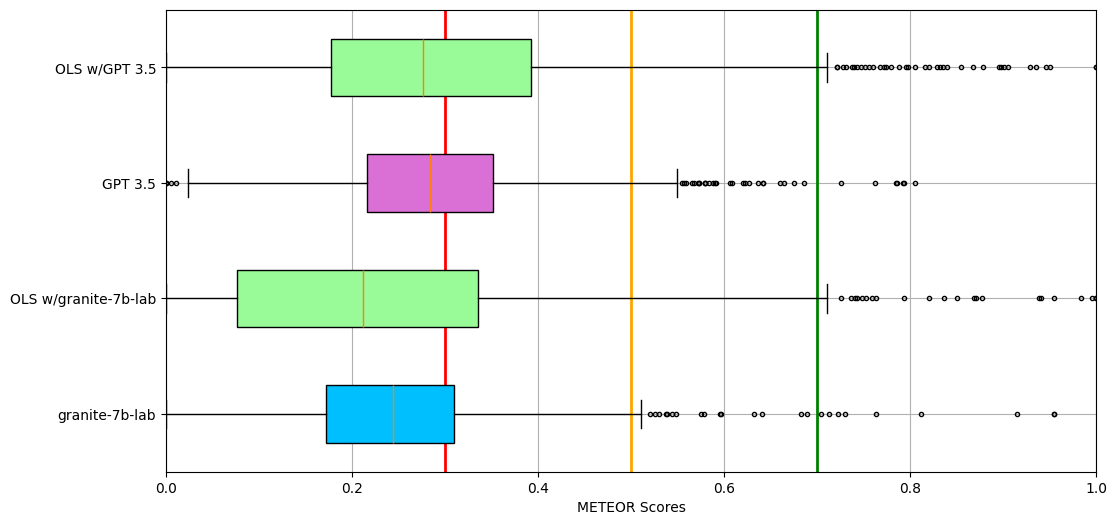

In [177]:
metric_name="meteor"

# MODELS ['GRANITE7B', 'OLS_GRANITE', 'OPENAI', 'OLS_OAI']
labels = ['granite-7b-lab',
          'OLS w/granite-7b-lab',
          'GPT 3.5',
          'OLS w/GPT 3.5',
         ]
colors = ['deepskyblue',# granite
          'palegreen',  # ols w/granite
          'orchid',     # gpt 3.5
          'palegreen']  # ols /gpt 3.5

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel(f'{metric_name.upper()} Scores')

ax.set_xlim(0,1)
ax.axvline(x=0.3,linewidth=2, color='r') 
ax.axvline(x=0.5,linewidth=2, color='orange') 
ax.axvline(x=0.7,linewidth=2, color='green') 
               
ax.grid(True)

df_models=df[[f'{MODELS[0]}@{metric_name}',
              f'{MODELS[1]}@{metric_name}',
              f'{MODELS[2]}@{metric_name}', 
              f'{MODELS[3]}@{metric_name}']]

bplot = ax.boxplot(df_models,
                   patch_artist=True,  # fill with color
                   sym='.', widths=0.5, 
                   tick_labels=labels, # will be used to label x-ticks
                   vert=False,         # horizontal
)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

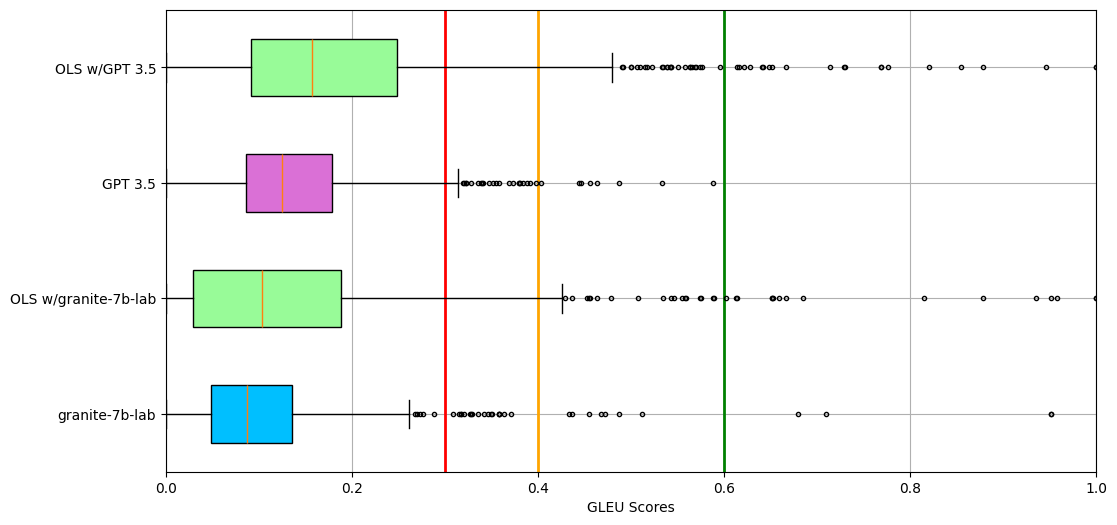

In [179]:
metric_name="gleu"

# MODELS ['GRANITE7B', 'OLS_GRANITE', 'OPENAI', 'OLS_OAI']
labels = ['granite-7b-lab',
          'OLS w/granite-7b-lab',
          'GPT 3.5',
          'OLS w/GPT 3.5',
         ]
colors = ['deepskyblue',# granite
          'palegreen',  # ols w/granite
          'orchid',     # gpt 3.5
          'palegreen']  # ols /gpt 3.5

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel(f'{metric_name.upper()} Scores')

ax.set_xlim(0,1)
ax.axvline(x=0.3,linewidth=2, color='r') 
ax.axvline(x=0.4,linewidth=2, color='orange') 
ax.axvline(x=0.6,linewidth=2, color='green') 
              
ax.grid(True)

df_models=df[[f'{MODELS[0]}@{metric_name}',
              f'{MODELS[1]}@{metric_name}',
              f'{MODELS[2]}@{metric_name}', 
              f'{MODELS[3]}@{metric_name}']]

bplot = ax.boxplot(df_models,
                   patch_artist=True,  # fill with color
                   sym='.', widths=0.5, 
                   tick_labels=labels, # will be used to label x-ticks
                   vert=False,         # horizontal
)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

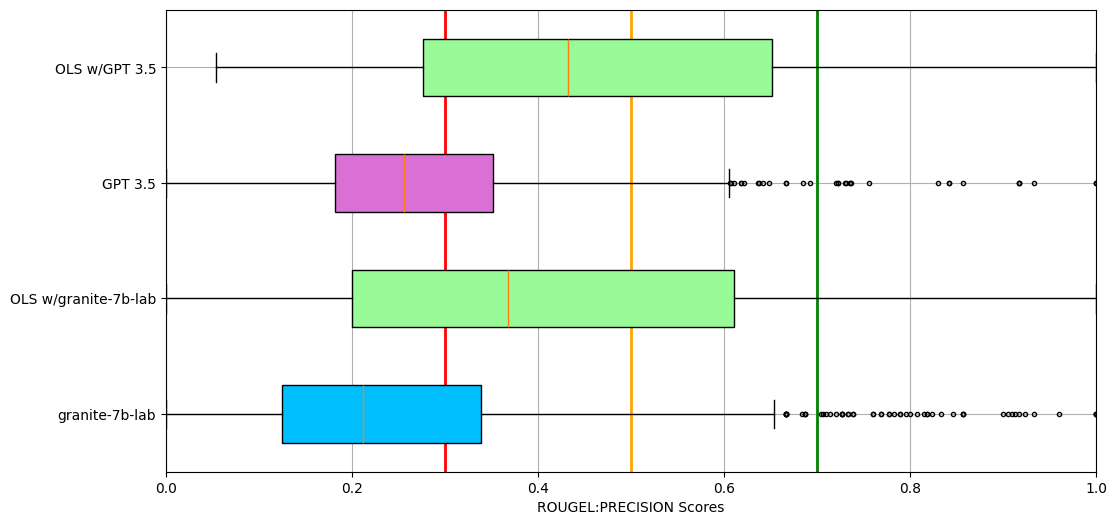

In [181]:
metric_name="rougeL:precision"

# MODELS ['GRANITE7B', 'OLS_GRANITE', 'OPENAI', 'OLS_OAI']
labels = ['granite-7b-lab',
          'OLS w/granite-7b-lab',
          'GPT 3.5',
          'OLS w/GPT 3.5',
         ]
colors = ['deepskyblue',# granite
          'palegreen',  # ols w/granite
          'orchid',     # gpt 3.5
          'palegreen']  # ols /gpt 3.5

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel(f'{metric_name.upper()} Scores')

ax.set_xlim(0,1)
ax.axvline(x=0.3,linewidth=2, color='r') 
ax.axvline(x=0.5,linewidth=2, color='orange') 
ax.axvline(x=0.7,linewidth=2, color='green')

ax.grid(True)

df_models=df[[f'{MODELS[0]}@{metric_name}',
              f'{MODELS[1]}@{metric_name}',
              f'{MODELS[2]}@{metric_name}', 
              f'{MODELS[3]}@{metric_name}']]

bplot = ax.boxplot(df_models,
                   patch_artist=True,  # fill with color
                   sym='.', widths=0.5, 
                   tick_labels=labels, # will be used to label x-ticks
                   vert=False,         # horizontal
)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## Analysis

The [GLEU](https://huggingface.co/spaces/evaluate-metric/google_bleu) score combines various metrics into a single score to describe how many n-grams match between the generated answer (the hypothesis) and the expected answer (ground truth). Since there are many ways to answer a question correctly, this score alone does not tell us if the answer is correct or not. Instead, it tell us how how likely they are similar. This score does not acount for synonyms and [stemmed words](https://saturncloud.io/glossary/stemming/) or [morphologically similar](https://www.nltk.org/howto/stem.html) words.


---
**GLEU Scores**
```
                  Model          P95          P99 
              GRANITE7B        0.235        0.434
            OLS_GRANITE        0.379        0.654
                 OPENAI        0.279        0.389
                OLS_OAI        0.477        0.729
```

- The GLEU score shows a 14 to 22 percent improvement when using OLS with `granite-7b-lab` over using the model directly.
- The GLEU score shows a 20 to 34 percent improvement  when using OLS with `gpt-3.5` over using the model directly.

---
**ROUGE-5 & ROUGE-L**
The [ROUGE](https://huggingface.co/spaces/evaluate-metric/rouge) metrics are a recall focused metrics. It compares quality of generated to reference text and how many words a model recall.

The specific ROUGE scores in this evaluation are:
- **ROUGE-N** (n=5, 5-gram based scoring). For this one, scores are excellent around 0.5, with scores above 0.5 considered good and 0.4 to 0.5 moderate
- [**ROUGE-L**](https://github.com/google-research/google-research/tree/master/rouge#two-flavors-of-rouge-l) (sentence-level Longest Common Subsequence (LCS) based scoring). For this one, scores are good, around 0.4, and low at 0.3 to 0.4.


```
              GRANITE7B R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.259        0.281        0.189        0.688        0.618        0.431 
                    p99        0.680        0.500        0.393        0.910        0.849        0.605 

            OLS_GRANITE R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.714        0.381        0.420        0.930        0.656        0.619 
                    p99        1.000        0.802        0.733        1.000        0.921        0.865 

                 OPENAI R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.260        0.314        0.232        0.548        0.650        0.478 
                    p99        0.478        0.593        0.391        0.833        0.855        0.597 

                OLS_OAI R5-precision    R5-recall  R5-fmeasure RL-precision    RL-recall  RL-fmeasure 
                    p95        0.781        0.489        0.510        0.942        0.722        0.698 
                    p99        1.000        0.821        0.756        1.000        0.975        0.874 
```

These ROUGE scores show improvement when using OLS over using the direct models. The improvements are in different magnitudes, ranges, and directions.

- Using OLS with the `granite-7b-lab` model delivers an improvement:
    - ROUGE-N: between 32 and 46 percent compared to using the model directly.
    - ROUGE-L: between 9 and 25 percent compared to using the model directly.
- Using OLS with the `gpt-3.5` model delivers an improvement:
    - ROUGE-N: between 52 and 53 percent compared to using the model directly.
    - ROUGE-L: between 17 and 18 percent compared to using the model directly.

---
**METEOR Scores**

The [METEOR](https://huggingface.co/spaces/evaluate-metric/meteor) score is a precision-based metric for measuring the quality of the generated text. It allows synonyms and stemmed words to be matched with the reference word. Generally, METEOR scores above 0.5 are considered decent, while scores above 0.7 are considered very good.


```
                  Model          P95          P99 
              GRANITE7B        0.432        0.684
            OLS_GRANITE        0.594        0.854
                 OPENAI        0.507        0.661
                OLS_OAI        0.669        0.883
```

These METEOR scores demonstrate overall improvements in using OLS with either of the models, a 16 to 22 percent improvement.


## Per Topic Analysis

In [82]:
MODELS

['GRANITE7B', 'OLS_GRANITE', 'OPENAI', 'OLS_OAI']

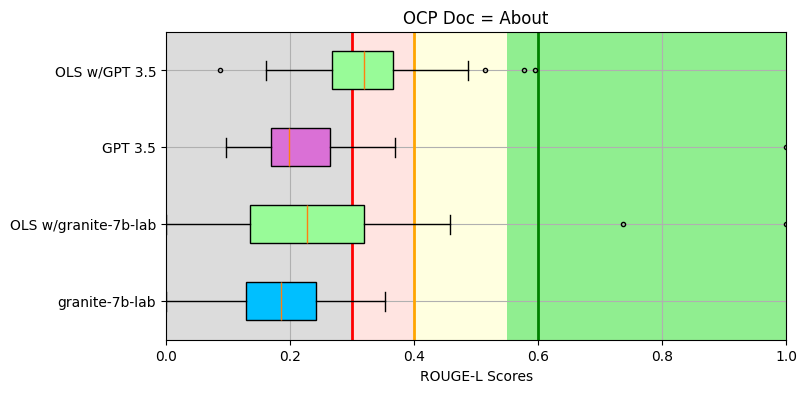

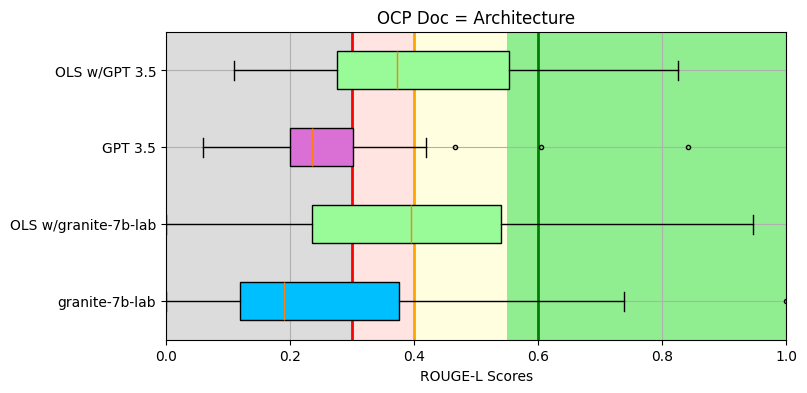

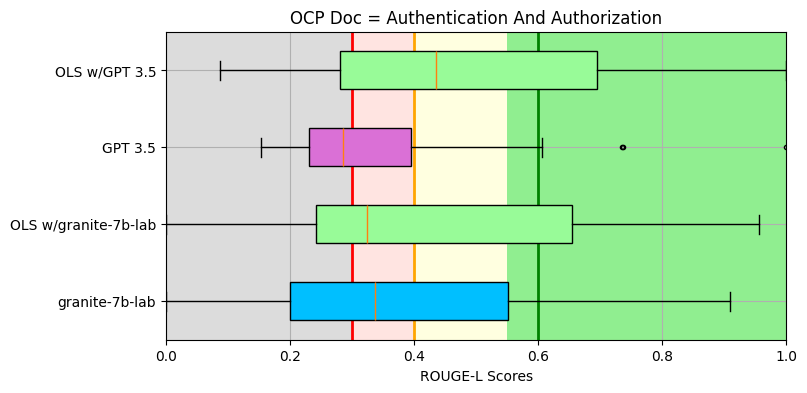

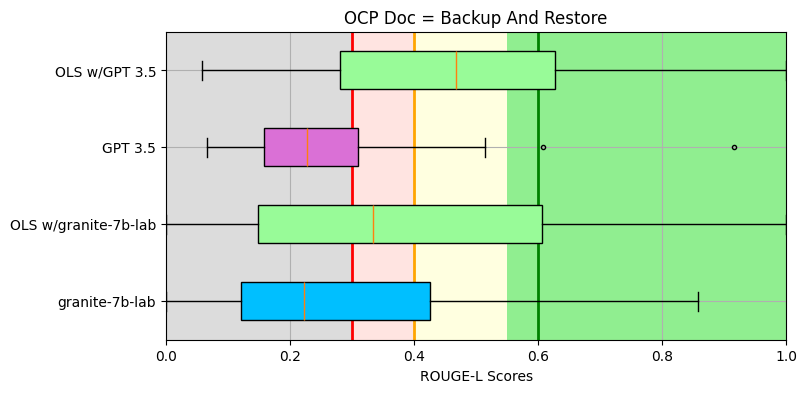

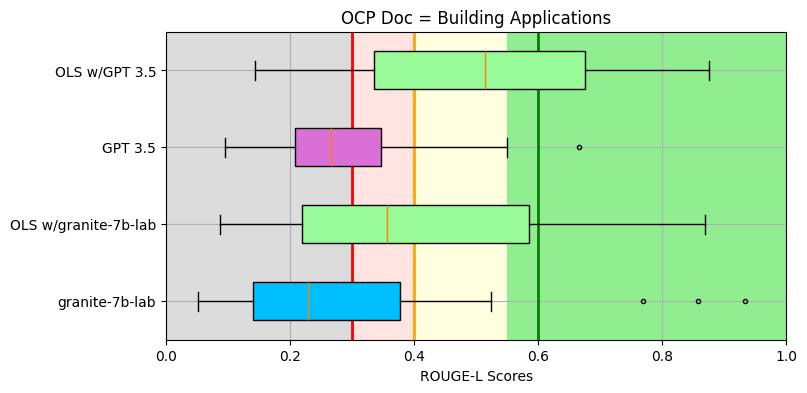

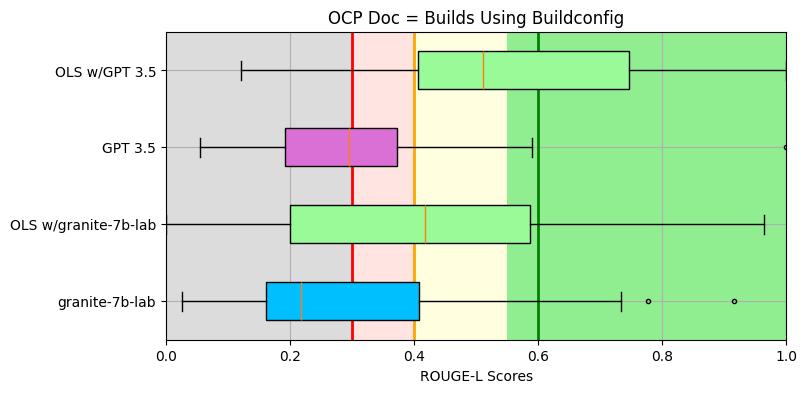

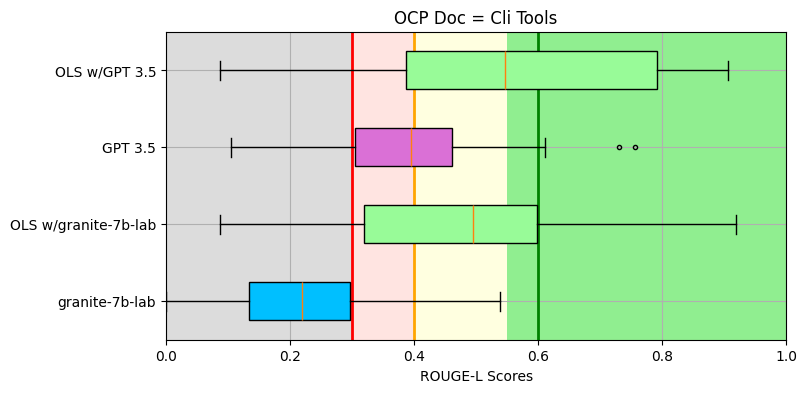

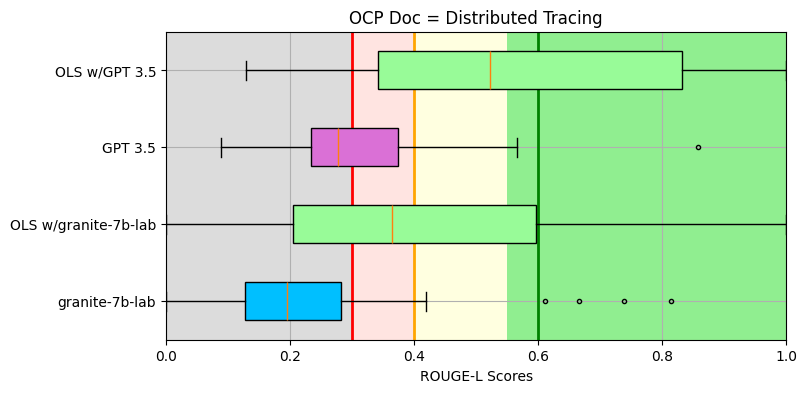

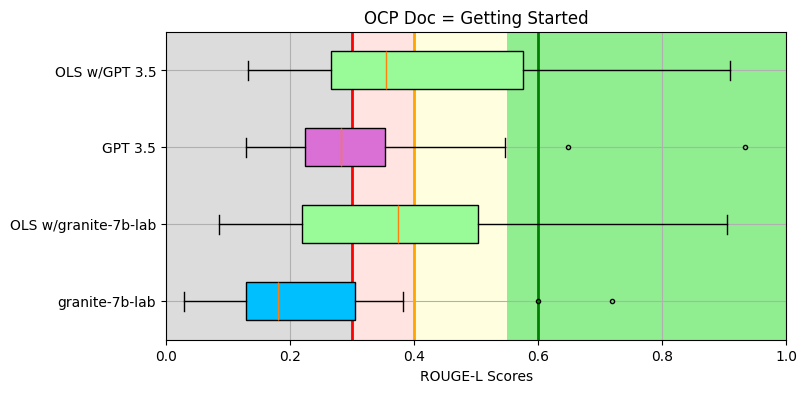

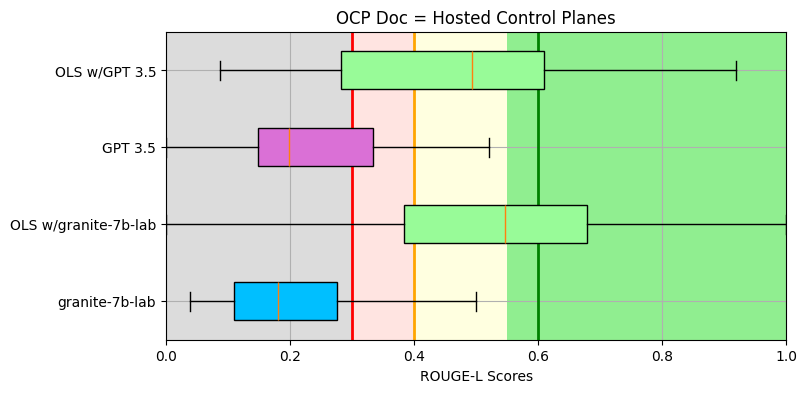

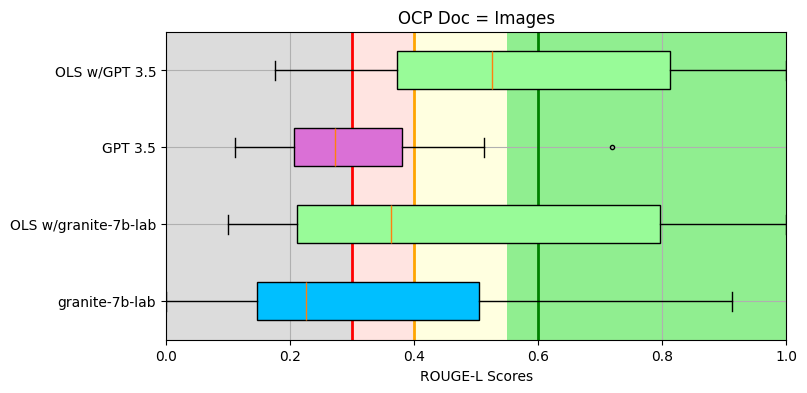

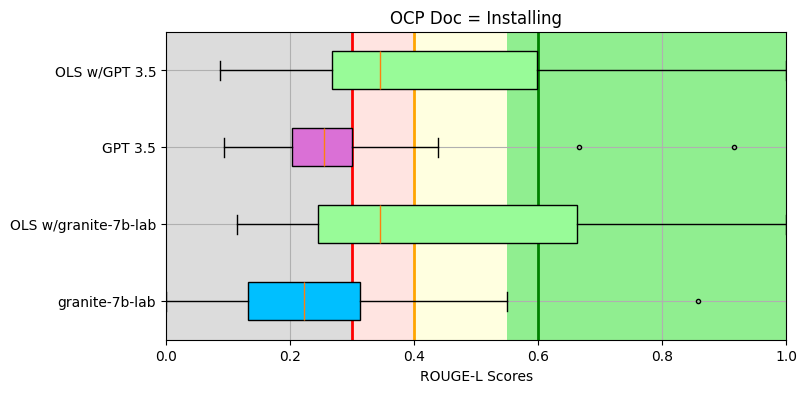

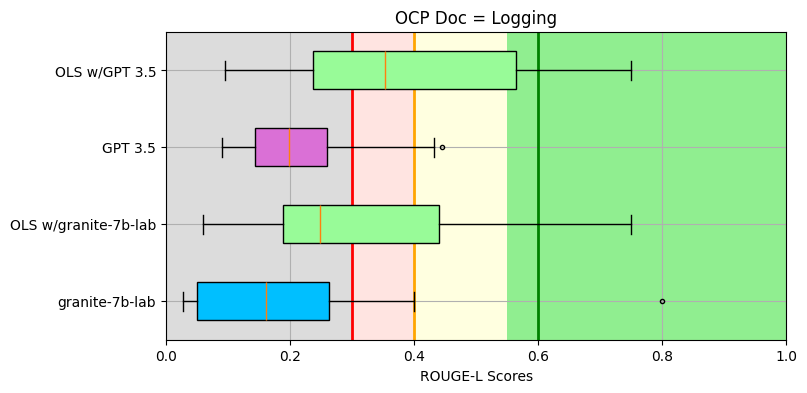

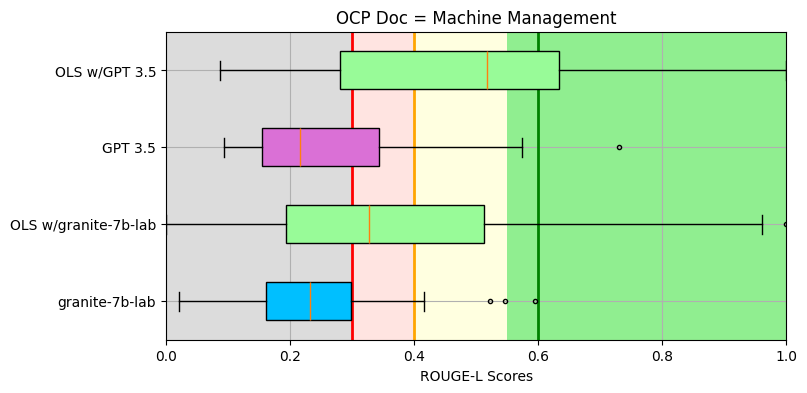

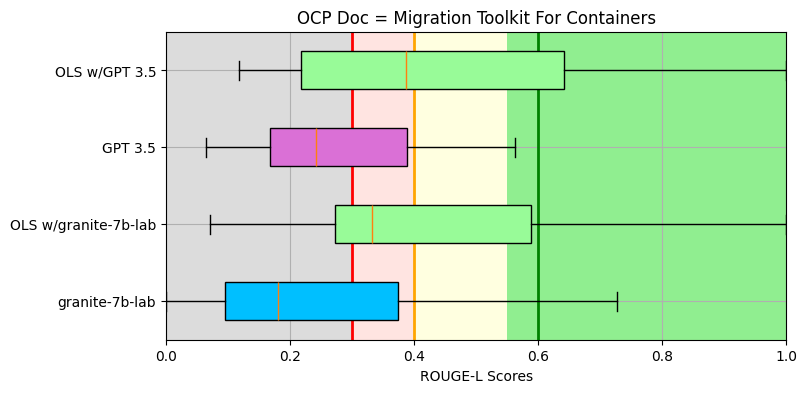

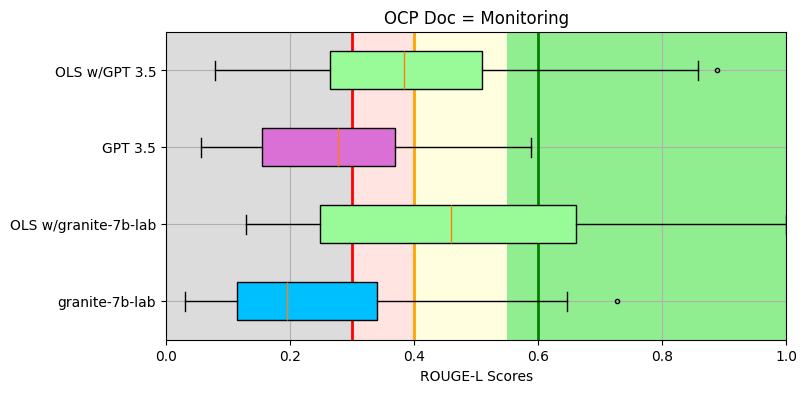

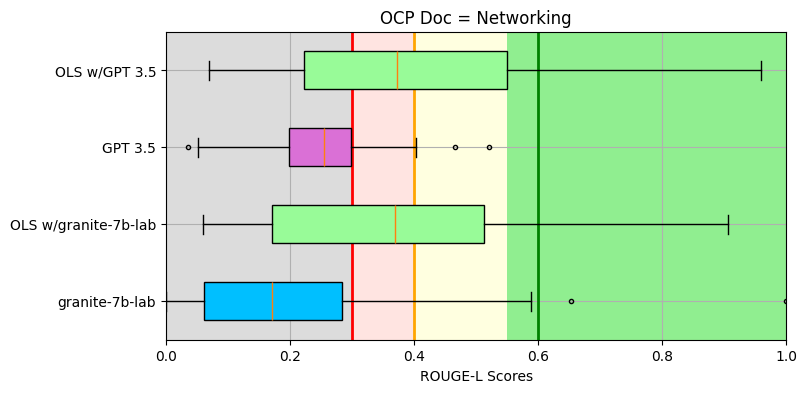

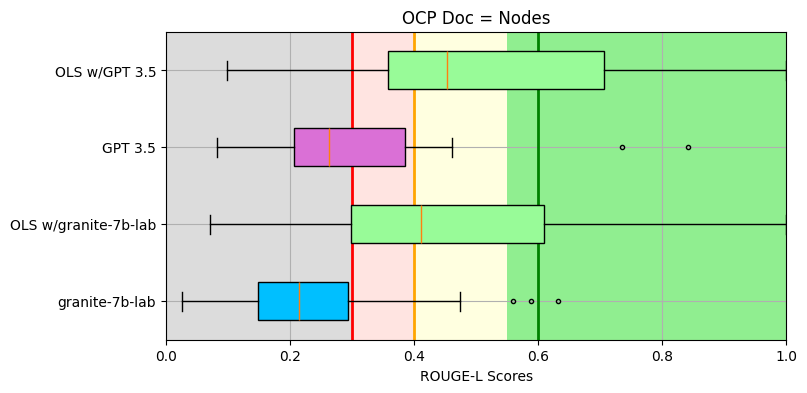

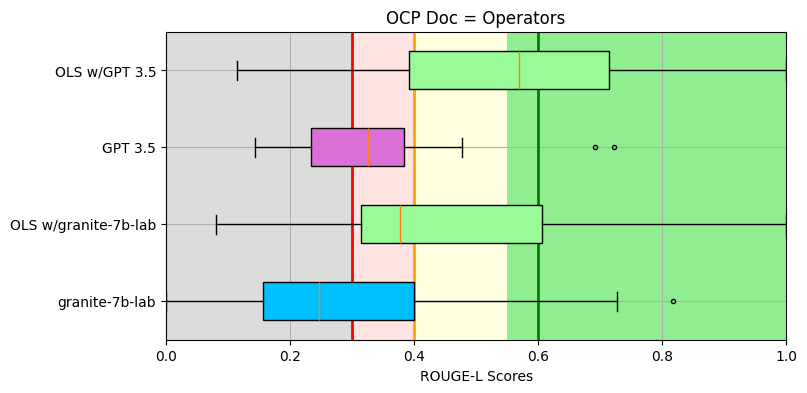

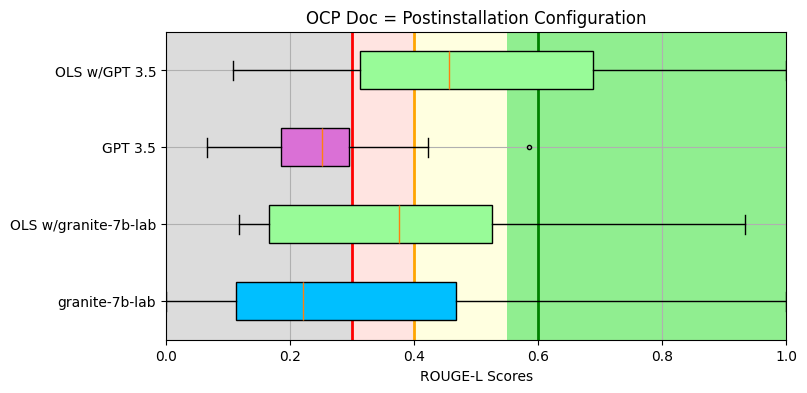

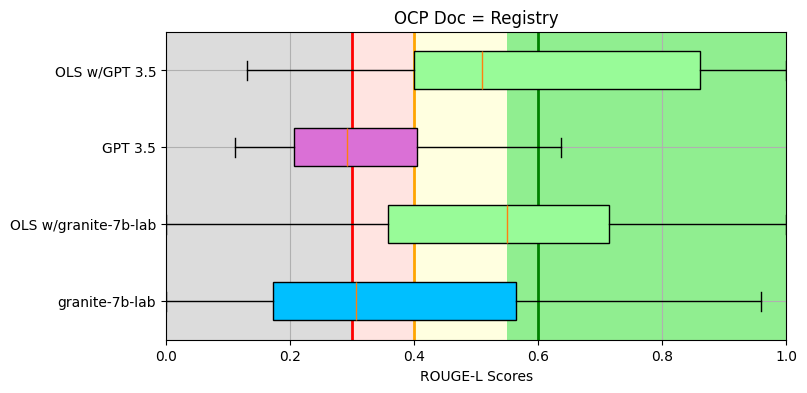

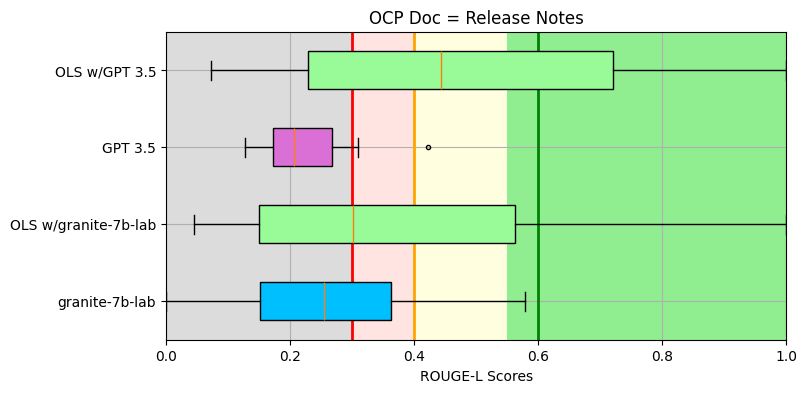

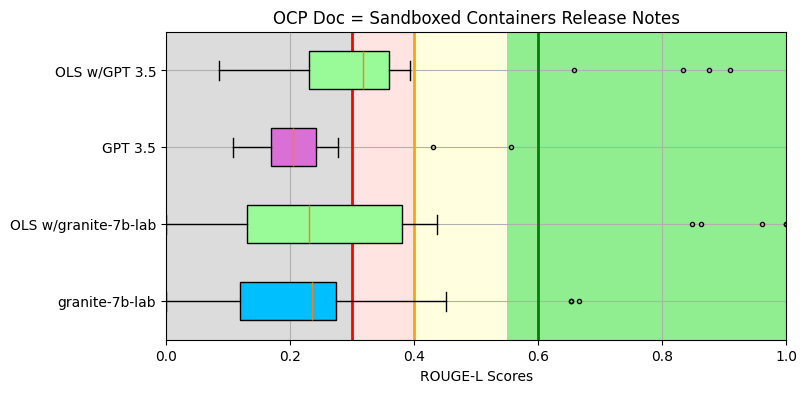

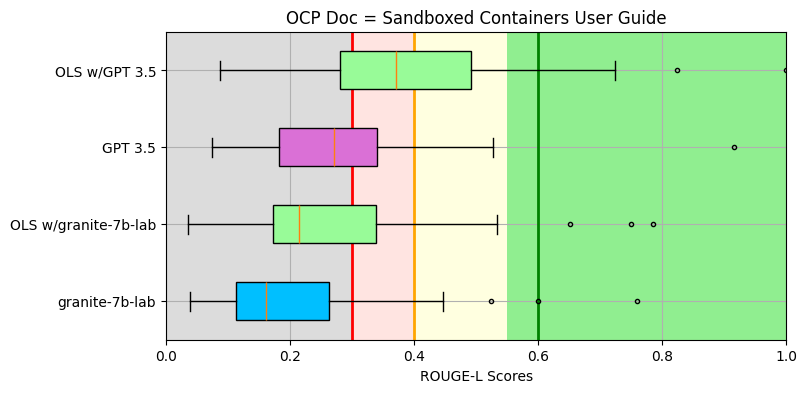

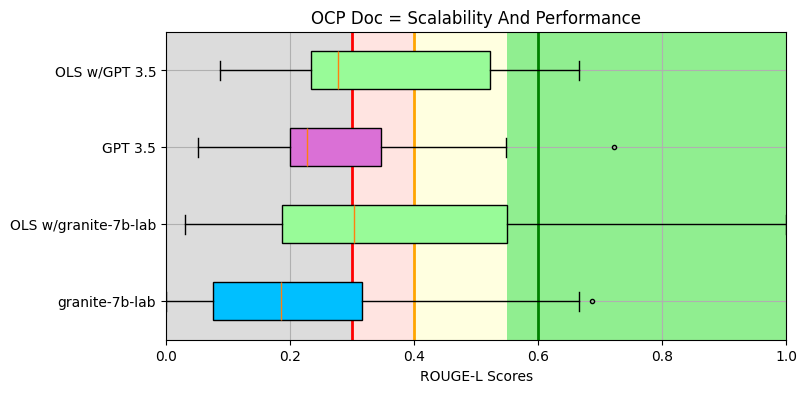

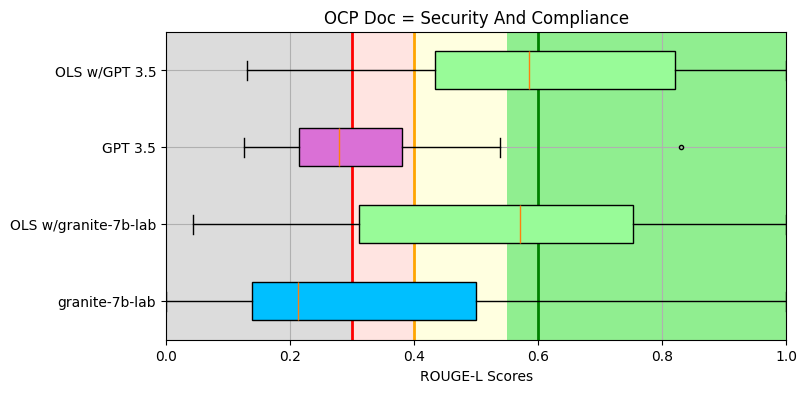

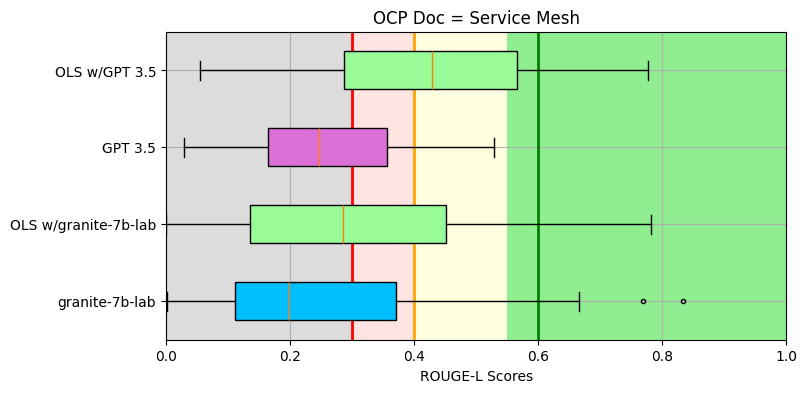

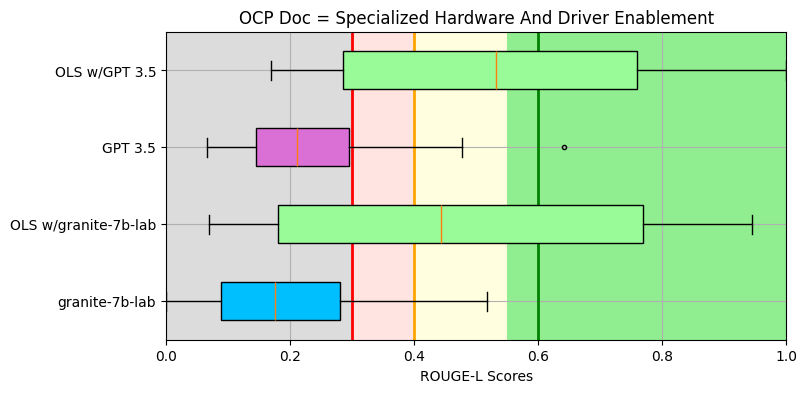

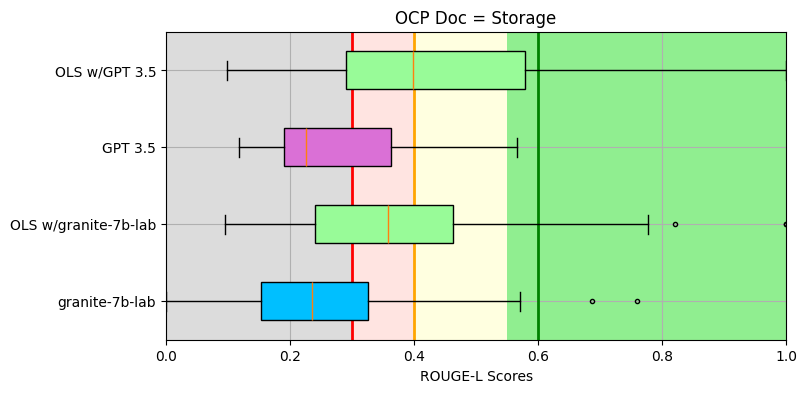

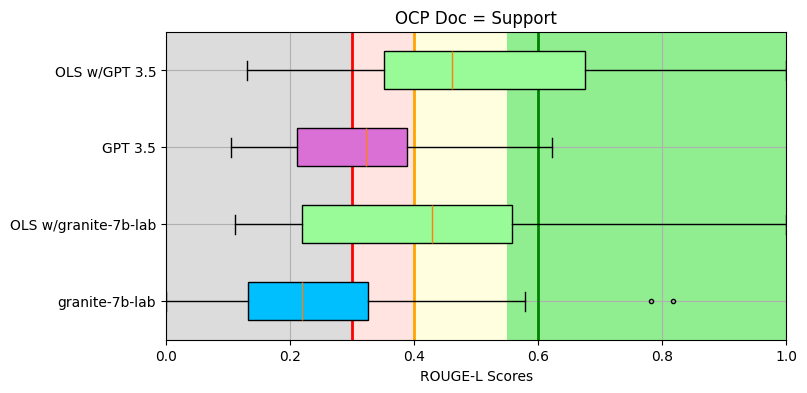

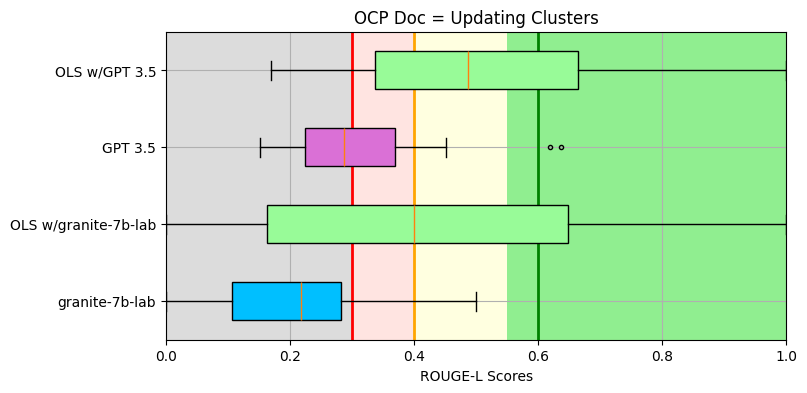

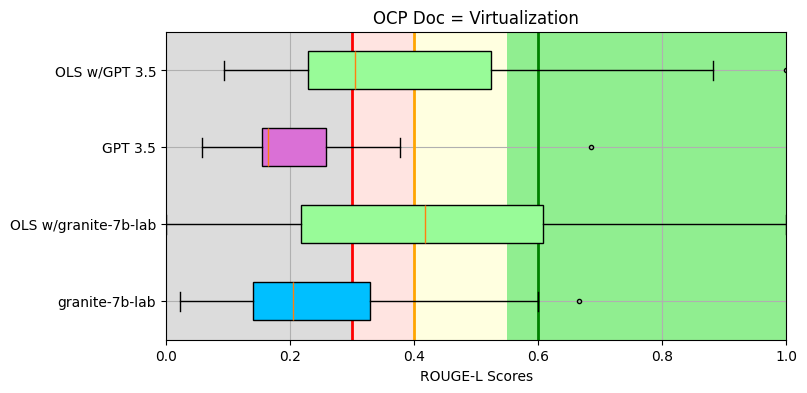

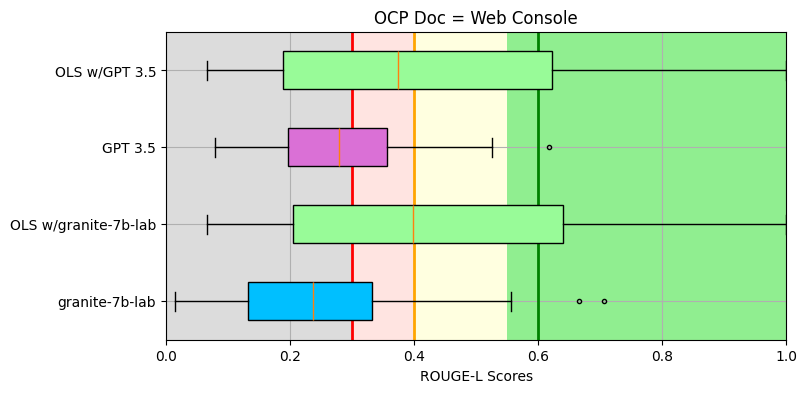

In [164]:
# ROUGE-L scores are good around 0.4, and low at 0.3 to 0.4.
metric_name="rougeL:precision"


# MODELS ['GRANITE7B', 'OLS_GRANITE', 'OPENAI', 'OLS_OAI']
labels = ['granite-7b-lab',
          'OLS w/granite-7b-lab',
          'GPT 3.5',
          'OLS w/GPT 3.5',
         ]

colors = ['deepskyblue',# granite
          'palegreen',  # ols w/granite
          'orchid',     # gpt 3.5
          'palegreen']  # ols /gpt 3.5

df_models=df[[f'{MODELS[0]}@{metric_name}',
              f'{MODELS[1]}@{metric_name}',
              f'{MODELS[2]}@{metric_name}', 
              f'{MODELS[3]}@{metric_name}',
              'doc_title'
             ]]

topics = df_models['doc_title'].unique()

for t in topics:
    results = df_models.loc[df_models['doc_title'] == t].drop(columns=['doc_title'])
    #print(f"{t} ==> {results.shape[0]} {results.columns}")

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_title(f'OCP Doc = {t}')
    ax.set_xlabel(f'ROUGE-L Scores')
    ax.set_xlim(0,1)

    ax.axvline(x=0.3,linewidth=2, color='r') 
    ax.axvspan(0, 0.3, facecolor='gainsboro')
    ax.axvspan(0.3, 0.4, facecolor='mistyrose')
    
    ax.axvline(x=0.4,linewidth=2, color='orange') 
    ax.axvspan(0.4, 0.6, facecolor='lightyellow')
    
    ax.axvline(x=0.6,linewidth=2, color='green') 
    ax.axvspan(0.55, 1.0, facecolor='lightgreen')

    
    ax.grid(True)
    
    bplot = ax.boxplot(results,
                       patch_artist=True,  # fill with color
                       sym='.', widths=0.5,
                       tick_labels=labels, # will be used to label x-ticks
                       vert=False,         # horizontal
    )

    # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.show()
